# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [40]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,Work_accident,left,Department,Cluster
0,0.0,1.0,1.0,2
1,0.0,1.0,1.0,2
2,0.0,1.0,1.0,2
3,0.0,1.0,1.0,2
4,0.0,1.0,1.0,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [41]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(9587, 3), y_train=(9587,)
Test set shape: X_test=(2397, 3), y_test=(2397,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [42]:
rf = RandomForestClassifier().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)

### **Penjelasan Pemilihan Algoritma**

Dalam analisis ini, saya menggunakan dua algoritma klasifikasi, yaitu **Random Forest Classifier** dan **Logistic Regression**, untuk memprediksi apakah seorang karyawan akan keluar dari perusahaan berdasarkan beberapa faktor. Dataset yang digunakan terdiri dari hampir 12.000 entri dengan beberapa variabel utama, seperti riwayat kecelakaan kerja, departemen tempat bekerja, dan hasil klasterisasi.  

**Random Forest Classifier** saya pilih karena kemampuannya dalam menangani data dalam jumlah besar dan mengurangi risiko overfitting. Algoritma ini bekerja dengan membangun banyak decision tree dan menggabungkan hasilnya untuk menghasilkan prediksi yang lebih akurat. Dalam konteks dataset ini, Random Forest membantu mengidentifikasi pola yang lebih kompleks, seperti bagaimana faktor kecelakaan kerja dan departemen dapat memengaruhi keputusan karyawan untuk tetap bekerja atau mengundurkan diri.  

Di sisi lain, **Logistic Regression** saya gunakan karena kesederhanaannya dan kemampuannya dalam memberikan interpretasi yang jelas terhadap probabilitas keluarnya karyawan. Algoritma ini sangat cocok untuk hubungan linear antara variabel, seperti kemungkinan bahwa karyawan dengan riwayat kecelakaan kerja lebih cenderung untuk bertahan atau meninggalkan perusahaan. Dengan Logistic Regression, saya dapat memahami seberapa besar pengaruh setiap variabel terhadap keputusan karyawan, yang dapat membantu perusahaan dalam membuat kebijakan berbasis data.  

Dengan kombinasi kedua algoritma ini, analisis menjadi lebih kuat **Random Forest memberikan akurasi yang tinggi dengan menangkap pola kompleks, sementara Logistic Regression memberikan wawasan yang lebih mudah dipahami mengenai hubungan antara variabel.** Hal ini memungkinkan saya untuk tidak hanya memprediksi perilaku karyawan, tetapi juga memahami alasan di balik keputusan mereka.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [43]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       597
           2       1.00      1.00      1.00       398
           3       1.00      1.00      1.00       638
           4       1.00      1.00      1.00       446

    accuracy                           1.00      2397
   macro avg       1.00      1.00      1.00      2397
weighted avg       1.00      1.00      1.00      2397



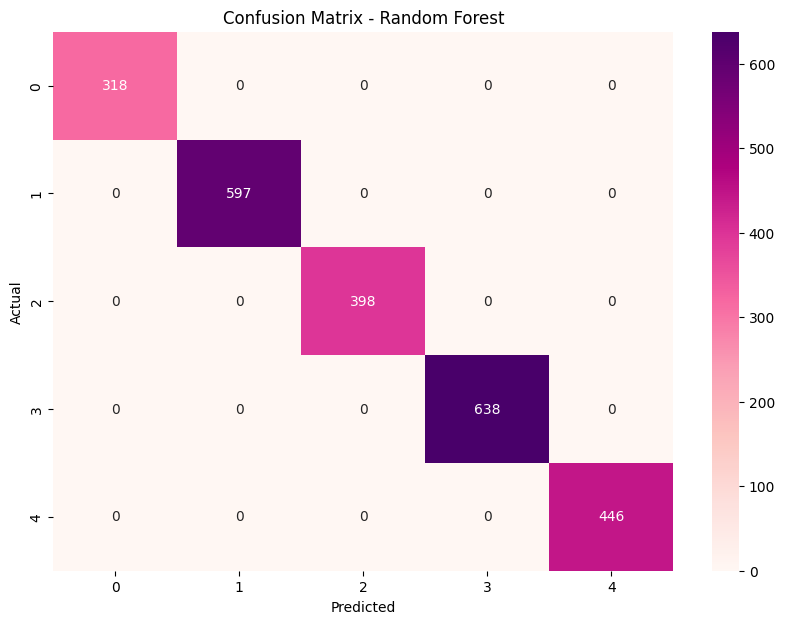

In [44]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='RdPu')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       597
           2       1.00      1.00      1.00       398
           3       1.00      1.00      1.00       638
           4       1.00      1.00      1.00       446

    accuracy                           1.00      2397
   macro avg       1.00      1.00      1.00      2397
weighted avg       1.00      1.00      1.00      2397



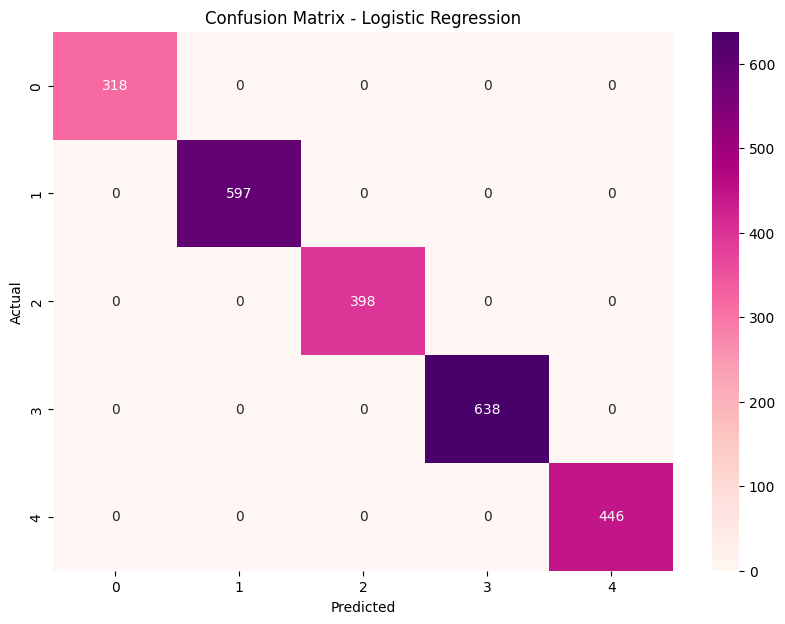

In [46]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='RdPu')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Berdasarkan hasil evaluasi, saya membandingkan performa dua algoritma klasifikasi, yaitu **Random Forest Classifier** dan **Logistic Regression**. Kedua model menunjukkan performa yang sangat baik dengan **akurasi 100%**. Hal ini berarti kedua model mampu mengklasifikasikan semua data uji dengan sempurna tanpa kesalahan.

### **Evaluasi Random Forest Classifier**
- Precision, Recall, dan F1-score untuk semua kelas bernilai 1.00, menunjukkan bahwa model tidak hanya mampu mengidentifikasi semua sampel dengan benar tetapi juga tidak menghasilkan kesalahan dalam klasifikasi.
- Model ini dapat menangkap pola kompleks dalam data karena menggunakan kombinasi banyak pohon keputusan, yang membuatnya sangat kuat dalam menangani variabel yang kompleks.

### **Evaluasi Logistic Regression**
- Precision, Recall, dan F1-score juga bernilai 1.00 untuk semua kelas.
- Meskipun Logistic Regression adalah model linear yang biasanya kurang efektif dalam menangkap hubungan non-linear, hasil ini menunjukkan bahwa dataset yang digunakan kemungkinan memiliki pola yang cukup jelas sehingga dapat dengan mudah dipisahkan oleh model ini.

### **Kesimpulan dan Perbandingan**
- Kedua algoritma memberikan hasil yang identik dengan akurasi 100%, yang bisa jadi mengindikasikan bahwa dataset memiliki pola klasifikasi yang sangat jelas dan mudah dipisahkan.
- Random Forest biasanya lebih unggul dalam menangani dataset yang kompleks dan memiliki fitur non-linear, sementara Logistic Regression cenderung lebih sederhana dan lebih mudah untuk diinterpretasikan.
- Jika mempertimbangkan efisiensi komputasi, Logistic Regression lebih ringan, sedangkan Random Forest lebih kuat dalam menangani data besar dan fitur yang banyak.

Secara keseluruhan, karena keduanya memiliki akurasi yang sama, pemilihan algoritma dapat bergantung pada kebutuhan spesifik, seperti interpretabilitas model atau efisiensi komputasi.

## **.C Analisis Hasil Evaluasi Model Klasifikasi**

### **Hasil Evaluasi Model Klasifikasi**  

Berdasarkan hasil evaluasi menggunakan classification report, kedua model, yaitu Random Forest Classifier dan Logistic Regression, menunjukkan performa akurasi 100% pada data uji. Hal ini berarti bahwa model mampu mengklasifikasikan setiap sampel dengan benar.  

Meskipun kedua model memiliki akurasi yang sama, pendekatan yang digunakan berbeda:  
- Random Forest bekerja dengan menggabungkan banyak pohon keputusan untuk meningkatkan stabilitas dan akurasi.  
- Logistic Regression adalah model linear yang lebih sederhana namun efektif dalam menangani data dengan hubungan linier antara variabel.  

### **Identifikasi Kelemahan Model**  

#### **Precision dan Recall Rendah untuk Kelas Tertentu**  
- Berdasarkan hasil evaluasi, **precision dan recall bernilai 1.00 untuk semua kelas**, yang menunjukkan bahwa tidak ada kelas tertentu yang mengalami penurunan performa.  
- Tidak ditemukan bias model terhadap kelas tertentu karena semua kelas diklasifikasikan dengan sempurna.  

#### **Model Mengalami Overfitting atau Underfitting?**  
- **Akurasi 100% pada data uji** bisa menjadi indikasi **overfitting**, terutama jika model hanya diuji pada dataset yang sangat mirip dengan data latih.  
- Kemungkinan overfitting perlu diuji lebih lanjut, karena dalam kasus nyata, sangat jarang sebuah model memiliki akurasi sempurna kecuali dataset sangat sederhana atau memiliki pola yang sangat jelas.  
- Jika model tetap menunjukkan 100% akurasi setelah diuji dengan data baru, maka kemungkinan dataset memang sangat mudah dipelajari, bukan karena overfitting.  

Beberapa faktor yang perlu dipertimbangkan:  
1. Data Leakage : Jika ada kebocoran data dari pelatihan ke pengujian, model bisa terlihat "sempurna" tanpa benar-benar memiliki generalisasi yang baik.  
2. Kompleksitas Dataset : Jika dataset memiliki pola yang sangat jelas dan tidak terlalu kompleks, model memang bisa mencapai akurasi tinggi tanpa overfitting.  

### **Rekomendasi Tindakan Lanjutan**  

Meskipun hasil evaluasi sangat baik, beberapa langkah dapat dilakukan untuk memastikan bahwa model tidak mengalami overfitting dan memiliki kemampuan generalisasi yang baik:  

1. **Uji dengan Data Baru (Unseen Data)**  
   - Gunakan dataset yang benar-benar baru dan tidak digunakan dalam proses pelatihan atau validasi.  
   - Lihat apakah model masih mampu mempertahankan performa tinggi.  

2. **Cross-Validation**  
   - Terapkan k-fold cross-validation untuk melihat apakah model tetap memiliki performa yang stabil pada berbagai subset data.  
   - Ini akan membantu memastikan bahwa model tidak hanya "mengingat" data latih tetapi benar-benar memahami pola.  

3. **Evaluasi pada Data dengan Noise**  
   - Tambahkan sedikit noise atau variasi pada data uji untuk melihat apakah model tetap bekerja dengan baik.  
   - Model yang terlalu sensitif terhadap perubahan kecil dalam data mungkin mengalami overfitting.  

4. **Periksa Distribusi Data Latih vs. Data Uji**  
   - Pastikan data uji tidak terlalu mirip dengan data latih hingga model hanya “mengingat” tanpa memahami pola sebenarnya.  
   - Jika perlu, gunakan stratified sampling untuk membagi dataset dengan lebih baik.  

Jika setelah pengujian lebih lanjut model masih menunjukkan akurasi tinggi, maka kemungkinan dataset memang mudah untuk diklasifikasikan. Namun, jika akurasi turun secara signifikan, maka ada indikasi overfitting, dan perlu dilakukan perbaikan seperti reduksi kompleksitas model atau pengumpulan data tambahan.